In [24]:
# In this script we want to solve the system of odes for assembling two 3-membered rings  
# with synthesis and degradation NOT included 
# Name: Leo Lagunes and Paige M.
# Date: 07/14/21 

# Last update: 03/08/22

# IMPORTANT NOTE: The equations were written and developed by Drs. Eric Deeds and Koan Briggs, this code was developed by LL + PM

#skip this cell if you've run it before
#import Pkg; Pkg.precompile()
#Pkg.add("Plots")
#using Pkg
#using Plots; gr()
#Pkg.add("DifferentialEquations")
#using DifferentialEquations

#println("Almost ready!")
#Pkg.update()
#ENV["GRDIR"]=""
#Pkg.build("GR")

#println("Get LSODA...")
#import Pkg; Pkg.add("LSODA") 
#import Pkg; Pkg.add("DiffEqBase")
#println("got it!")

# println("One more...")
#import Pkg; Pkg.add("Peaks")
#println("Ready bitch!")
#println("............")

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


In [55]:
# This cell contains all the functions + packages to run everything

#------------------------------------
#--- List of packages here ---
#------------------------------------
using DifferentialEquations
using Plots; gr()
using Printf
using Peaks
using LSODA, DiffEqBase
# -----------------------------------
# --- Solve the system of ode's -----
# -----------------------------------

function StackedRings_EJD(paramvaluesList)
    x0Val, kOn, δ, Q, kd1, kd2 = paramvaluesList
    p = kOn, δ, Q
    keff(i,j)= kOn*(kd1)^i*(kd2)^j*ℯ^(-(i+j-1)*9/0.6)
    function TwoStackedRingsSystem!(dx, x, p, t)
        dx[1] = - 2*kOn*0.5*x[1]*x[1] + 1*keff(1,0)*x[2] - 2*kOn*0.5*x[1]*x[1] + 1*keff(1,0)*x[2] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[3] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[3] - 1*kOn*1*x[1]*x[2] + 3*keff(2,0)*x[4] - 1*kOn*1*x[1]*x[2] + 1*keff(0,1)*x[5] - 1*kOn*1*x[1]*x[2] + 1*keff(0,1)*x[6] - 2*kOn*1*x[1]*x[3] + 1*keff(1,0)*x[6] - 2*kOn*1*x[1]*x[3] + 1*keff(1,0)*x[5] - 3*kOn*1*x[1]*x[4] + 1*keff(0,1)*x[7] - 1*kOn*1*x[1]*x[5] + 1*keff(2,0)*x[7] - 1*kOn*1*x[1]*x[5] + 2*keff(1,0)*x[8] - 1*kOn*1*x[1]*x[5] + 2*keff(1,1)*x[9] - 1*kOn*1*x[1]*x[6] + 1*keff(2,0)*x[7] - 1*kOn*1*x[1]*x[6] + 2*keff(1,1)*x[9] - 1*kOn*1*x[1]*x[6] + 2*keff(1,0)*x[10] - 2*kOn*1*x[1]*x[7] + 2*keff(1,1)*x[11] - 2*kOn*1*x[1]*x[8] + 1*keff(2,1)*x[11] - 2*kOn*1*x[1]*x[9] + 1*keff(2,0)*x[11] - 2*kOn*1*x[1]*x[10] + 1*keff(2,1)*x[11] - 1*kOn*1*x[1]*x[11] + 6*keff(2,1)*x[12]   
        dx[2] = + 2*kOn*0.5*x[1]*x[1] - 1*keff(1,0)*x[2] - 1*kOn*1*x[1]*x[2] + 3*keff(2,0)*x[4] - 1*kOn*1*x[1]*x[2] + 1*keff(0,1)*x[5] - 1*kOn*1*x[1]*x[2] + 1*keff(0,1)*x[6] - 1*kOn*0.5*x[2]*x[2] + 1*keff(0,2)*x[9] - 1*kOn*0.5*x[2]*x[2] + 1*keff(0,2)*x[9] - 1*kOn*0.5*x[2]*x[2] + 1*keff(0,1)*x[10] - 1*kOn*0.5*x[2]*x[2] + 1*keff(0,1)*x[10] - 1*kOn*0.5*x[2]*x[2] + 1*keff(0,1)*x[8] - 1*kOn*0.5*x[2]*x[2] + 1*keff(0,1)*x[8] - 2*kOn*1*x[2]*x[3] + 1*keff(2,0)*x[7] - 3*kOn*1*x[2]*x[4] + 1*keff(0,2)*x[11] - 1*kOn*1*x[2]*x[5] + 1*keff(2,1)*x[11] - 1*kOn*1*x[2]*x[6] + 1*keff(2,1)*x[11] - 1*kOn*1*x[2]*x[7] + 6*keff(2,2)*x[12]
        dx[3] = + 1*kOn*0.5*x[1]*x[1] - 1*keff(0,1)*x[3] - 2*kOn*1*x[1]*x[3] + 1*keff(1,0)*x[6] - 2*kOn*1*x[1]*x[3] + 1*keff(1,0)*x[5] - 2*kOn*1*x[2]*x[3] + 1*keff(2,0)*x[7] - 4*kOn*0.5*x[3]*x[3] + 1*keff(2,0)*x[9] - 4*kOn*0.5*x[3]*x[3] + 1*keff(2,0)*x[9] - 2*kOn*1*x[3]*x[5] + 1*keff(3,0)*x[11] - 2*kOn*1*x[3]*x[6] + 1*keff(3,0)*x[11] - 2*kOn*1*x[3]*x[9] + 3*keff(4,0)*x[12]  
        dx[4] = + 1*kOn*1*x[1]*x[2] - 3*keff(2,0)*x[4] - 3*kOn*1*x[1]*x[4] + 1*keff(0,1)*x[7] - 3*kOn*1*x[2]*x[4] + 1*keff(0,2)*x[11] - 3*kOn*0.5*x[4]*x[4] + 1*keff(0,3)*x[12] - 3*kOn*0.5*x[4]*x[4] + 1*keff(0,3)*x[12]  
        dx[5] = + 1*kOn*1*x[1]*x[2] - 1*keff(0,1)*x[5] + 2*kOn*1*x[1]*x[3] - 1*keff(1,0)*x[5] - 1*kOn*1*x[1]*x[5] + 1*keff(2,0)*x[7] - 1*kOn*1*x[1]*x[5] + 2*keff(1,0)*x[8] - 1*kOn*1*x[1]*x[5] + 2*keff(1,1)*x[9] - 1*kOn*1*x[2]*x[5] + 1*keff(2,1)*x[11] - 2*kOn*1*x[3]*x[5] + 1*keff(3,0)*x[11] - 1*kOn*0.5*x[5]*x[5] + 3*keff(4,1)*x[12] - 1*kOn*0.5*x[5]*x[5] + 3*keff(4,1)*x[12]    
        dx[6] = + 1*kOn*1*x[1]*x[2] - 1*keff(0,1)*x[6] + 2*kOn*1*x[1]*x[3] - 1*keff(1,0)*x[6] - 1*kOn*1*x[1]*x[6] + 1*keff(2,0)*x[7] - 1*kOn*1*x[1]*x[6] + 2*keff(1,1)*x[9] - 1*kOn*1*x[1]*x[6] + 2*keff(1,0)*x[10] - 1*kOn*1*x[2]*x[6] + 1*keff(2,1)*x[11] - 2*kOn*1*x[3]*x[6] + 1*keff(3,0)*x[11] - 1*kOn*0.5*x[6]*x[6] + 3*keff(4,1)*x[12] - 1*kOn*0.5*x[6]*x[6] + 3*keff(4,1)*x[12]     
        dx[7] = + 3*kOn*1*x[1]*x[4] - 1*keff(0,1)*x[7] + 1*kOn*1*x[1]*x[5] - 1*keff(2,0)*x[7] + 1*kOn*1*x[1]*x[6] - 1*keff(2,0)*x[7] - 2*kOn*1*x[1]*x[7] + 2*keff(1,1)*x[11] + 2*kOn*1*x[2]*x[3] - 1*keff(2,0)*x[7] - 1*kOn*1*x[2]*x[7] + 6*keff(2,2)*x[12]  
        dx[8] = + 1*kOn*1*x[1]*x[5] - 2*keff(1,0)*x[8] - 2*kOn*1*x[1]*x[8] + 1*keff(2,1)*x[11] + 1*kOn*0.5*x[2]*x[2] - 1*keff(0,1)*x[8]  
        dx[9] = + 1*kOn*1*x[1]*x[5] - 2*keff(1,1)*x[9] + 1*kOn*1*x[1]*x[6] - 2*keff(1,1)*x[9] - 2*kOn*1*x[1]*x[9] + 1*keff(2,0)*x[11] + 1*kOn*0.5*x[2]*x[2] - 1*keff(0,2)*x[9] + 4*kOn*0.5*x[3]*x[3] - 1*keff(2,0)*x[9] - 2*kOn*1*x[3]*x[9] + 3*keff(4,0)*x[12]   
        dx[10] = + 1*kOn*1*x[1]*x[6] - 2*keff(1,0)*x[10] - 2*kOn*1*x[1]*x[10] + 1*keff(2,1)*x[11] + 1*kOn*0.5*x[2]*x[2] - 1*keff(0,1)*x[10]  
        dx[11] = + 2*kOn*1*x[1]*x[7] - 2*keff(1,1)*x[11] + 2*kOn*1*x[1]*x[8] - 1*keff(2,1)*x[11] + 2*kOn*1*x[1]*x[9] - 1*keff(2,0)*x[11] + 2*kOn*1*x[1]*x[10] - 1*keff(2,1)*x[11] - 1*kOn*1*x[1]*x[11] + 6*keff(2,1)*x[12] + 3*kOn*1*x[2]*x[4] - 1*keff(0,2)*x[11] + 1*kOn*1*x[2]*x[5] - 1*keff(2,1)*x[11] + 1*kOn*1*x[2]*x[6] - 1*keff(2,1)*x[11] + 2*kOn*1*x[3]*x[5] - 1*keff(3,0)*x[11] + 2*kOn*1*x[3]*x[6] - 1*keff(3,0)*x[11]  
        dx[12] = 1*kOn*1*x[1]*x[11] - 6*keff(2,1)*x[12] + 1*kOn*1*x[2]*x[7] - 6*keff(2,2)*x[12] + 2*kOn*1*x[3]*x[9] - 3*keff(4,0)*x[12] + 3*kOn*0.5*x[4]*x[4] - 1*keff(0,3)*x[12] + 1*kOn*0.5*x[5]*x[5] - 3*keff(4,1)*x[12] + 1*kOn*0.5*x[6]*x[6] - 3*keff(4,1)*x[12]
    end
    x0=[x0Val; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0]
    
    # --- time span ---
    tspan = (0.001, 10.0^9)
    # tspan = (0.000001, 10.0^9)
    # tspan = (0.000001, 10.0^12)
    #tspan = (0.000001, 86400)

    # --- ode solver --- 
    #println("---")
    #println("Solving - fixed parameter set...")
    prob = ODEProblem(TwoStackedRingsSystem!,x0,tspan,p)
    # sol = solve(prob,RadauIIA5(autodiff=false), abstol = 1e-9, reltol = 1e-9);
    sol = solve(prob,RadauIIA5(autodiff=false), abstol = 1e-12, reltol = 1e-12);
    # sol = solve(prob,lsoda(), abstol = 1e-12, reltol = 1e-12); 
    # sol = solve(prob,lsoda());
    # sol = solve(prob,Rosenbrock23(autodiff=false), abstol = 1e-12, reltol = 1e-12);
    # sol = solve(prob,Rosenbrock23(autodiff=false), abstol = 1e-9, reltol = 1e-9); 
    # sol = solve(prob,Rodas4P(autodiff=false), abstol = 1e-7, reltol = 1e-7) 
    # sol = solve(prob,TRBDF2());
    #println("Solved ")
    return sol
end

println("Solve Differential Equations: StackedRings_EJD(paramvaluesList)")
#-----------------------
# --- Assembly Yeild ---
#-----------------------
function assemblyYield(solRaw)
    # this function will return the assembly yield value at the last time point 
    # Yn = n*Xn/XT
    #print(sol.u)
    Yn = 0 
    sol=solRaw
    n=12; #XN = sol(end,:); println(XN)
    listSol=[t.+2u for (u,t) in zip(sol.u,sol.t)];
    # This will give the concentratiions of each species at time point 0.01 
    #sol(0.01)
    tEnd = 10^6; t0 = 0.0
    #print(solRaw)
     # NEED THE AY AFTER 24HRS = 86400 seconds!!!!
    timePts = solRaw.t; totPts = length(timePts);
    allSols = solRaw.u; #print(allSols)
    slntEnd_pre = allSols[totPts,:]; slntEnd = slntEnd_pre[1]
    # --- calculate Xn = X12 ---
    nSpec = length(slntEnd); 
    Xn = slntEnd[nSpec]
    # --- calculate XT --- 
    cnt = 1; XT = 0
    for it in slntEnd
        addIt = cnt*it
        XT += addIt
        cnt += 1
    end
    # --- calculate Yn ---
    Yn = n*Xn/XT;
    
    return Yn
    
end

println("get AY w/ last time point: assemblyYield(solRaw)")
#-----------------------------------
# --- Assembly Yeild after 24 hrs---
#-----------------------------------
function assemblyYield_24hrs(solRaw, x0Val)
    # this function will return the assembly yield value after 24hrs! 
    # Yn = n*Xn/XT
    #print(sol.u)
    Yn = 0 
    sol=solRaw
    n=6; #XN = sol(end,:); println(XN)
    listSol=[t.+2u for (u,t) in zip(sol.u,sol.t)];
    # --- take the concentrations at the end of 24hrs = 86400 sec ---
    t24 = sol(86400); # print(t24)
    # This will give the concentratiions of each species at time point 0.01 
    #sol(0.01)
     # NEED THE AY AFTER 24HRS = 86400 seconds!!!!
    allSols = t24; #print(allSols)
    slntEnd=allSols;
    #slntEnd_pre = allSols[totPts,:]; slntEnd = slntEnd_pre[1]
    # --- calculate Xn = X12 ---
    nSpec = length(allSols); #print("species: ", nSpec)
    Xn = allSols[nSpec]; #print("X12: ", Xn)
    # --- calculate XT --- 
    # define XT as the IC of monomers (predefined - compare them-maybe Xn)
    XT = x0Val; # print(XT)
    # --- calculate Yn ---
    Yn = n*Xn/XT;
    
    return Yn
    
end
println("get AY after 24hrs: assemblyYield_24hrs(solRaw)")
#-----------------------------
# --- plot the time course ---
#-----------------------------
function plotTimeCourse(sol,AY)
    # sol = stackedRings_sd(paramvaluesList)
    # This function will plot the time course for the solved odes and label the AY at the last time point
    AYrnd = round(AY,digits=5)
    p1=plot(sol,linewidth=2,title="Stacked rings + synth/deg with AY= $AYrnd",xaxis = ("Time (t)",:log ),
         yaxis="x(t)", label = ["x1" "x2" "x3" "x4" "x5" "x6" "x7" "x8" "x9" "x10" "x11" "x12"] ) # legend=false
    # add a line at 1
    # hline!(p1, value = 1, strokeDash = 1, xaxis =:log)
    display(p1)
    println("Plot done!")

    # sol.t[end],sol[end]
    println("Saving file...")
    #savefig("C:\\plot_2SR_0720_001.png")
    println("Figure saved")
    
end 

println("to get time course: plotTimeCourse(sol, AY)")

#-----------------------
# --- AY time course ---
#-----------------------

function AYtimeCourse(solRaw)
    #This function will return the Assembly yield for every time point in a time course for the last species x12
    # --- empty list/initialization --- #
    list_AY=[]
    Yn = 0 
    sol=solRaw
    n=12; #XN = sol(end,:); println(XN)
    listSol=[t.+2u for (u,t) in zip(sol.u,sol.t)];
    # This will give the concentratiions of each species at time point 0.01 
    #sol(0.01)
    tEnd = 10^6; t0 = 0.0
    #print(solRaw)
    timePts = solRaw.t; totPts = length(timePts); # print("total time points: ", totPts)
    allSols = solRaw.u; #print(allSols)
    for tp_i = 1:totPts
        #println("item in loop: ")
        # print("time: ", tp_i, "\n")
        #print(tp_i)
        # slntEnd_pre = allSols[totPts,:]; slntEnd = slntEnd_pre[1]
        # NEED THE AY AFTER 24HRS = 86400 seconds! 
        slntEnd_pre = allSols[tp_i,:]; #slntEnd = slntEnd_pre[1]
        slntEnd = slntEnd_pre[1]
        # --- calculate Xn = X12 ---
        nSpec = length(slntEnd); 
        Xn = slntEnd[nSpec]
        # --- calculate XT --- 
        cnt = 1; XT = 0
        for it in slntEnd
            addIt = cnt*it
            XT += addIt
            cnt += 1
        end
        # --- calculate Yn ---
        Yn = n*Xn/XT; # add this to the AY list
        # print("AY at ti= ", Yn)
        push!(list_AY, Yn)
    end 
    # print("all tps: ", timePts)
    return list_AY, timePts   
end

println("AY Time course: AYtimecourse(solRaw)")

#----------------------------
# --- plot AY time course ---
#----------------------------
function plotAYtimeCourse(list_AY, timePts)
    # print("total pts: ", length(timePts), "\n")
    #print("--")
    # this function will plot the AY time course give the AY list and the time points 
    p2=plot(timePts,list_AY,linewidth=2,title="Stacked rings Assembly Yield + NO synth/deg",xaxis = ("Time (t)",:log ),
         yaxis="AY(t)", label = ["x12"], legend=:bottomright ) # legend=false
    # add a vertical line at 24hrs mark
    plot!([86400, 86400], [0, 1])
    # hline!(p1, value = 1, strokeDash = 1, xaxis =:log)
    display(p2)
    println("Plot done!")

    # sol.t[end],sol[end]
    #println("Saving file...")
    #savefig("C:\\plot_2SR_0816_AY_001.png")
    #println("Figure saved")
    return p2
    
end 

println("to plot time course: plotAYtimeCourse(list_AY, timePts)")

#----------------------------
# --- calculate AY vs IC  ---
#----------------------------
function calcAYvsIC(nICpts,minDeg, maxDeg, kd1, kd2)
    # this function will calculate AY for different initial condition values at each time point but only for the x12 species 
    # nICpts = number of initial condition points to consider
    mags = LinRange(minDeg, maxDeg,nICpts)
    allICs = 10 .^mags
    # allICs = [10^-8, 10^-5, 10^-3]

    # initialize lists to store
    AY_list = []; solsList = []
    # loop to solve AY for each IC 
    for icVal in allICs # loop through all the IC values
        #x0Val=10^-4; 
        x0Val=icVal; #print(x0Val)
        # solve the system
        paramvaluesList= x0Val, kOn, δ, Q, kd1, kd2
        # sol = StackedRings_sd(paramvaluesList);
        sol = StackedRings_EJD(paramvaluesList);
        # calculate AY 
        ayVali = assemblyYield_24hrs(sol, x0Val); #print(ayVali)
        # store value of AY 
        push!(AY_list, ayVali)
        # print("AY: ", ayVali)
    end 
    
    return allICs, AY_list
    
end 
println("to calculate AY vs IC: calcAYvsIC(nICpts)")

#----------------------------
# --- plot AY vs IC curve ---
#----------------------------
function plotAYvsIC_curve(allICs, AY_list)
    # This function will plot the AY for increasing Initial Conditions 
    p3=plot(allICs,AY_list,linewidth=2, linecolor=:red,title="Stacked rings Assembly Yield vs Initial Conditions",xaxis = ("Initial Concentration (M)",:log ),
         yaxis="Assembly Yield",legend=false ) # legend=false
    # add a line at 1
    # hline!(p1, value = 1, strokeDash = 1, xaxis =:log)
    display(p3)
    println("Plot done!")

    # sol.t[end],sol[end]
    #println("Saving file...")
    #savefig("C:\\plot_ICvsAY_0824.png")
    #println("Figure saved")
end 
# println("to plot AY vs IC: plotAYvsIC_curve(allICs, AY_list)")
println("to plot AY vs IC: plotAYvsIC_curve(allICs, AY_list)")


# -------------------------------------
# --- Calculate AY vs IC + Kd1 ---
# -------------------------------------
function calcAYvsIC_heatmap(nICpts_ICs, minDeg_IC, maxDeg_IC, nKdspts, minDeg_kd, maxDeg_kd)
    IC_kd_1_AY_matrix = zeros(nICpts_ICs,nKdspts);
    IC_kd_2_AY_matrix = zeros(nICpts_ICs,nKdspts);
    # make a vector that holds all the Kd's - log normally distributed on each direction 
    mags = LinRange(minDeg_kd, maxDeg_kd,nKdspts);
    allKds_1 = 10 .^mags; allKds_2 = 10 .^mags

    # make a vector that holds all the ICs's - log normally distributed on each direction 
    mags = LinRange(minDeg_IC, maxDeg_IC,nICpts_ICs)
    allICs = 10 .^mags

    # now calculate the AY for each combination of IC vs Kd1/2
    # --- this loop is for kd1 ---
    # fix kd2
    kd2 = 10^-9;
    for ic_ind in 1:nICpts_ICs # for each IC value
        ic_val = allICs[ic_ind]
        # print("\n" , ic_val , "\n")
        for kd1_ind in 1:nKdspts # for each Kd value 
            kd1 = allKds_1[kd1_ind]
            # calculate the AY
            x0Val=ic_val
            paramvaluesList= x0Val, kOn, δ, Q, kd1, kd2
            # sol = StackedRings_sd(paramvaluesList);
            sol = StackedRings_EJD(paramvaluesList);
            # calculate AY 
            ayVali = assemblyYield_24hrs(sol, x0Val); 
            #print("IC= ", x0Val, " kd1= ", kd1, " AY= ", ayVali, "\n")
            IC_kd_1_AY_matrix[ic_ind,kd1_ind]=ayVali
        end 
    end 
    
    return allICs, allKds_1, IC_kd_1_AY_matrix
end 
println("to calculate AY vs IC+kd: calcAYvsIC_heatmap(allICs, AY_list)")



Solve Differential Equations: StackedRings_EJD(paramvaluesList)
get AY w/ last time point: assemblyYield(solRaw)
get AY after 24hrs: assemblyYield_24hrs(solRaw)
to get time course: plotTimeCourse(sol, AY)
AY Time course: AYtimecourse(solRaw)
to plot time course: plotAYtimeCourse(list_AY, timePts)
to calculate AY vs IC: calcAYvsIC(nICpts)
to plot AY vs IC: plotAYvsIC_curve(allICs, AY_list)
to calculate AY vs IC+kd: calcAYvsIC_heatmap(allICs, AY_list)


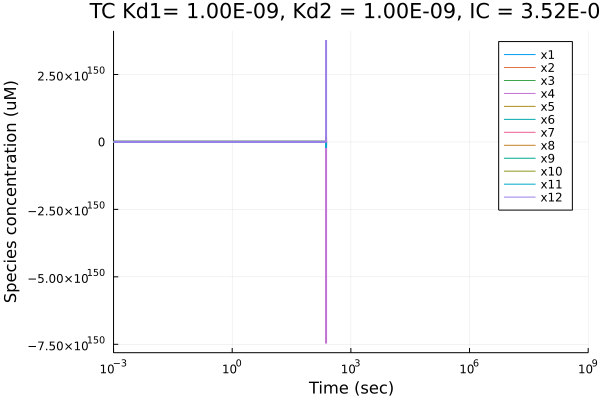

Figure saved

In [54]:
# -----------------------------
# --- Time course plot only ---
# -----------------------------

# LL - 03/09/22

# just plot a simple time course to test the solver
c0=1 # 1M
kOn = 10^6 # 10^6 M^-1 s^-1 
ΔGp = 9 # 9kcal/M
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 

IC_1 = 3.52*10^-9;
kd1 = 10^-9 #within a ring (inter) #the bigger the KD to weaker
kd2 = 10^-9 #between ring (intra)

kd1Form = @sprintf "%.2E" kd1
kd2Form = [(@sprintf "%.2E" 10^-9), (@sprintf "%.2E" 10^-8),(@sprintf "%.2E" 10^-7),(@sprintf "%.2E" 10^-6),
                (@sprintf "%.2E" 10^-5),(@sprintf "%.2E" 10^-4),(@sprintf "%.2E" 10^-3)]
x0Val=IC_1
paramvaluesList= x0Val, kOn, δ, Q, kd1, kd2
# --- solve fixed parameter ex ---
icPrint = @sprintf "%.2E" x0Val
sol = StackedRings_EJD(paramvaluesList)
# --- plot --- 
p1=plot(sol,linewidth=2,title="TC Kd1= $(kd1Form), Kd2 = $(kd2Form[1]), IC = $(icPrint)",xaxis = ("Time (sec)",:log ),
     yaxis="Species concentration (uM)", label = ["x1" "x2" "x3" "x4" "x5" "x6" "x7" "x8" "x9" "x10" "x11" "x12"] ) # legend=false

# put a gray line at the 24hr mark
t24 = [86400, 86400]; t24Y=[0,x0Val] 
plot!(t24,t24Y, color = :gray,line =:dashdot, label=false)

display(p1)
# save image
#savefig(p1,"TC_0314_critVal_A_noRelTol_IC_lsoda.pdf")
print("Figure saved")

In [18]:
# LSODA EXAMPLE

function rhs!(t, x, ydot, data)
	ydot[1]=1.0E4 * x[2] * x[3] - .04E0 * x[1]
	ydot[3]=3.0E7 * x[2] * x[2]
	ydot[2]=-ydot[1] - ydot[3]
  nothing
end

y0 = [1.,0.,0.]
tspan = [0., 0.4]
res =  lsoda(rhs!, y0, tspan, reltol= 1e-4)

lsoda_0(rhs!, y0, tspan, reltol= 1e-4)

at t =   4.0000e-01 y=   9.851723e-01   3.386398e-05   1.479387e-02
at t =   4.0000e+00 y=   9.055141e-01   2.240417e-05   9.446348e-02
at t =   4.0000e+01 y=   7.158086e-01   9.184725e-06   2.841822e-01
at t =   4.0000e+02 y=   4.504928e-01   3.222544e-06   5.495040e-01
at t =   4.0000e+03 y=   1.831766e-01   8.940790e-07   8.168225e-01
at t =   4.0000e+04 y=   3.897412e-02   1.621365e-07   9.610257e-01
at t =   4.0000e+05 y=   4.936887e-03   1.984434e-08   9.950631e-01
at t =   4.0000e+06 y=   5.166549e-04   2.067675e-09   9.994833e-01
at t =   4.0000e+07 y=   5.201540e-05   2.080723e-10   9.999480e-01
at t =   4.0000e+08 y=   5.206059e-06   2.082434e-11   9.999948e-01
at t =   4.0000e+09 y=   5.205986e-07   2.082395e-12   9.999995e-01
at t =   4.0000e+10 y=   5.201627e-08   2.080651e-13   9.999999e-01


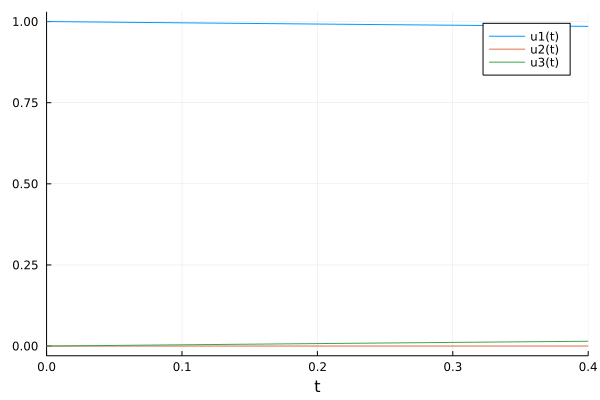

In [23]:
# LSODA EXAMPLE COMMON INTERFACE

function rhs!(du, u, p, t)
    du[1]=1.0E4 * u[2] * u[3] - .04E0 * u[1]
    du[3]=3.0E7 * u[2] * u[2]
    du[2]=-du[1] - du[3]
  nothing
end

y0 = [1.,0.,0.]
tspan = (0., 0.4)
prob = ODEProblem(rhs!,y0,tspan)

sol = solve(prob,lsoda())

plotExmp=plot(sol)

In [57]:
#-------------------------------
# --- IC vs AY curve ---
#-------------------------------

# LL - 02/26/22
# find the local extrema of the blue curve and then plot the time courses for each of those critical values
# using Peaks

c0=1 # 1M
kOn = 10^6 # 10^6 M^-1 s^-1 
ΔGp = 9 # 9kcal/M
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 

nICpts=10^3;minDeg=-9; maxDeg=-3

kd1 = 10^-9 #within a ring (inter) #the bigger the KD to weaker
# --- change these to generate highlighted curves --- 
# - 10^-9 curve -
kd2 = 10^-9 #between ring (intra)
allAYvsIC_9 = calcAYvsIC(nICpts,minDeg, maxDeg,kd1, kd2)
allICs_9= allAYvsIC_9[1]; AYvals_9=allAYvsIC_9[2];

# local extrema of the AY curve 
# local max
pks, vals = findmaxima(AYvals_9); localMax_x = allICs_9[pks]
localMax_y=vals
# local min
pks, vals = findminima(AYvals_9); localMin_x = allICs_9[pks]
localMin_y=vals

# points to plot
absExtr_x=[localMax_x[1],localMax_x[2],localMin_x[1],localMin_x[2]];
absExtr_y=[localMax_y[1],localMax_y[2],localMin_y[1],localMin_y[2]]
#print("all x vals: ", absExtr_x, "\n")
#print("all y vals: ", absExtr_y)

# --- Plot ---
kd1Form = @sprintf "%.2E" kd1
kd2Form = [(@sprintf "%.2E" 10^-9), (@sprintf "%.2E" 10^-8),(@sprintf "%.2E" 10^-7),(@sprintf "%.2E" 10^-6),
                (@sprintf "%.2E" 10^-5),(@sprintf "%.2E" 10^-4),(@sprintf "%.2E" 10^-3)]

p3_curve=plot(scatter(absExtr_x,absExtr_y,markershape = :circle, color=:red), label = ["Critical value"])

plot!(allICs_9,AYvals_9,linewidth=2, palette = :lighttest,
    title=(" AY vs Initial Conditions with Kd1= $(kd1Form)"),xaxis = ("Initial Concentration (M)",:log ),
         yaxis="Assembly Yield", label = "Kd2 = $(kd2Form[1])")

display(p3_curve)
# save image
savefig(p3_curve,"ICvsAY_0312_critVals_radau.pdf")
print("Figure saved")

┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/UIp7W/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/UIp7W/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/UIp7W/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/UIp7W/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/UIp7W/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/UIp7W/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/UIp7W/src

┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/UIp7W/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/UIp7W/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/UIp7W/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/UIp7W/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/UIp7W/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/UIp7W/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/UIp7W/src

┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/UIp7W/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/UIp7W/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/UIp7W/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/UIp7W/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/UIp7W/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/UIp7W/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/UIp7W/src

LoadError: InterruptException:

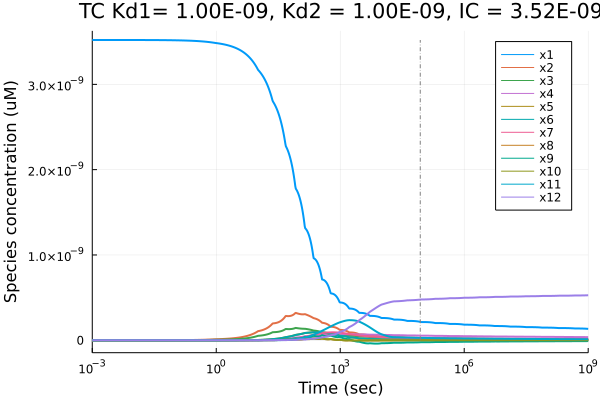

Figure saved

In [7]:
#-------------------------------------
# --- IC vs AY curve time courses ---
#-------------------------------------

# LL - 03/07/22
# now plot the time courses for each of the critical values to 
# investigate the AY or why there is a kink in the AY vs IC curve

# leave all the parameters the same. 
# What I need to do is extract the IC and plot the time course associated with that IC

allIC_crit = absExtr_x
allAYs_crit = absExtr_y

#IC_1 = allIC_crit[1];
IC_1 = 3.52*10^-9;
AY1 = allAYs_crit[1]; #print("AY: ", AY1)

x0Val=IC_1
paramvaluesList= x0Val, kOn, δ, Q, kd1, kd2
# --- solve fixed parameter ex ---
icPrint = @sprintf "%.2E" x0Val
sol = StackedRings_EJD(paramvaluesList)
p1=plot(sol,linewidth=2,title="TC Kd1= $(kd1Form), Kd2 = $(kd2Form[1]), IC = $(icPrint)",xaxis = ("Time (sec)",:log ),
     yaxis="Species concentration (uM)", label = ["x1" "x2" "x3" "x4" "x5" "x6" "x7" "x8" "x9" "x10" "x11" "x12"] ) # legend=false

# put a gray line at the 24hr mark
t24 = [86400, 86400]; t24Y=[0,x0Val] 
plot!(t24,t24Y, color = :gray,line =:dashdot, label=false)

display(p1)
# save image
savefig(p1,"TC_0307_critVal_A_relTol_IC.pdf")
print("Figure saved")

┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src

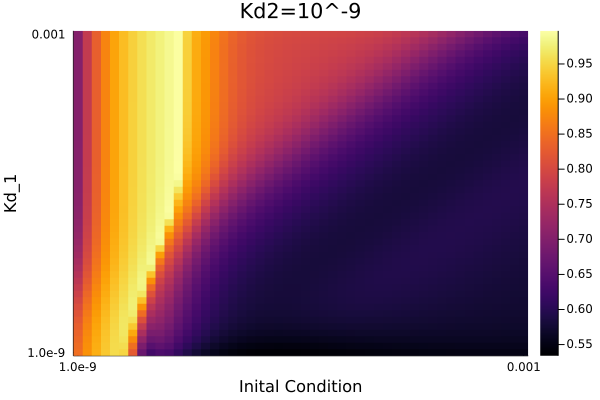

┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331


Figure saved

In [2]:
#---------------------------------
# --- IC vs AY + Kds heatmaps ---
#---------------------------------

# LL 

# KD1 varies!! 

#import Pkg; Pkg.add("PlotlyJS")
#using PlotlyJS
# make heatmaps that compare AY cs IC and each of the two Kd's 

# fixed parameters:
c0=1 # 1M
kOn = 10^6 # 10^6 M^-1 s^-1
ΔGp = 9 # 9kcal/M
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 

# initializations 

nICpts_ICs=50;minDeg_IC=-9;maxDeg_IC=-3; # IC pts
nKdspts=50;minDeg_kd=-9; maxDeg_kd=-3 # Kd pts

# IC_kd_1_AY_matrix=calcAYvsIC_heatmap(nICpts_ICs, minDeg_IC, maxDeg_IC, nKdspts, minDeg_kd, maxDeg_kd)

IC_kd_1_AY_matrix = zeros(nICpts_ICs,nKdspts);

# make a vector that holds all the Kd's - log normally distributed on each direction 
mags = LinRange(minDeg_kd, maxDeg_kd,nKdspts);
allKds_1 = 10 .^mags

# make a vector that holds all the ICs's - log normally distributed on each direction 
mags = LinRange(minDeg_IC, maxDeg_IC,nICpts_ICs)
allICs = 10 .^mags

# now calculate the AY for each combination of IC vs Kd1/2
# --- this loop is for kd1 ---
# fix kd2
kd2 = 10^-9;
for ic_ind in 1:nICpts_ICs # for each IC value
    ic_val = allICs[ic_ind]
    # print("\n" , ic_val , "\n")
    for kd1_ind in 1:nKdspts # for each Kd value 
        kd1 = allKds_1[kd1_ind]
        # calculate the AY
        x0Val=ic_val
        paramvaluesList= x0Val, kOn, δ, Q, kd1, kd2
        # sol = StackedRings_sd(paramvaluesList);
        sol = StackedRings_EJD(paramvaluesList);
        # calculate AY 
        ayVali = assemblyYield_24hrs(sol, x0Val); 
        #print("IC= ", x0Val, " kd1= ", kd1, " AY= ", ayVali, "\n")
        IC_kd_1_AY_matrix[ic_ind,kd1_ind]=ayVali
    end 
end 

AY_mat = transpose(IC_kd_1_AY_matrix);

icLabels = [allICs[1],allICs[nICpts_ICs]];
kd1Labels = [allKds_1[1], allKds_1[nKdspts]]

plot2= heatmap(AY_mat,xticks=(1:nICpts_ICs-1:nICpts_ICs, icLabels), yticks=(1:nKdspts-1:nKdspts, kd1Labels), 
    xlabel = "Inital Condition", ylabel="Kd_1",title="Kd2=10^-9")

display(plot2)
# save image
savefig(plot2,"ICvsAY_kd1_0215.pdf")
print("Figure saved")

#print(allKds_1)

#print(allICs)






In [5]:
#---------------------------------
# --- IC vs AY + Kds heatmaps ---
#---------------------------------

# LL 

#import Pkg; Pkg.add("PlotlyJS")
#using PlotlyJS
# make heatmaps that compare AY cs IC and each of the two Kd's 

# fixed parameters:
c0=1 # 1M
kOn = 10^6 # 10^6 M^-1 s^-1
ΔGp = 9 # 9kcal/M
Rconst = 1.98/1000 # Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 

# initializations 

nICpts_ICs=50;minDeg_IC=-9;maxDeg_IC=-3; # IC pts
nKdspts=50;minDeg_kd=-9;maxDeg_kd=-3; # Kd pts

# IC_kd_1_AY_matrix=calcAYvsIC_heatmap(nICpts_ICs, minDeg_IC, maxDeg_IC, nKdspts, minDeg_kd, maxDeg_kd)

IC_kd_2_AY_matrix = zeros(nICpts_ICs,nKdspts);

# make a vector that holds all the Kd's - log uniformly distributed on each direction 
mags = LinRange(minDeg_kd, maxDeg_kd,nKdspts);
allKds_2 = 10 .^mags

# make a vector that holds all the ICs's - log uniformly distributed on each direction 
mags = LinRange(minDeg_IC, maxDeg_IC,nICpts_ICs)
allICs = 10 .^mags

# now calculate the AY for each combination of IC vs Kd1/2
# --- this loop is for kd2 ---
# fix kd1
kd1 = 10^-9;
for ic_ind in 1:nICpts_ICs # for each IC value
    ic_val = allICs[ic_ind]
    # print("\n" , ic_val , "\n")
    for kd2_ind in 1:nKdspts # for each Kd value 
        kd2 = allKds_2[kd2_ind]
        # calculate the AY
        x0Val=ic_val
        paramvaluesList= x0Val, kOn, δ, Q, kd1, kd2
        # sol = StackedRings_sd(paramvaluesList);
        sol = StackedRings_EJD(paramvaluesList);
        # calculate AY 
        ayVali = assemblyYield_24hrs(sol, x0Val); 
        #print("IC= ", x0Val, " kd1= ", kd1, " AY= ", ayVali, "\n")
        IC_kd_2_AY_matrix[ic_ind,kd2_ind]=ayVali
    end 
end 

AY_mat_kd2 = transpose(IC_kd_2_AY_matrix);

icLabels = [allICs[1],allICs[nICpts_ICs]];
kd1Labels = [allKds_2[1], allKds_2[nKdspts]]

plot2= heatmap(AY_mat_kd2,xticks=(1:nICpts_ICs-1:nICpts_ICs, icLabels), yticks=(1:nKdspts-1:nKdspts, kd1Labels), 
    xlabel = "Inital Condition", ylabel="Kd_2",title="Kd1=10^-3")

display(plot2)
# save image
savefig(plot2,"ICvsAY_kd2_0215_3.pdf")
print("Figure saved")

#print(allKds_1)

#print(allICs)






┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src

┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src

┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src

┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src

┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/leolagunes/.julia/packages/SciMLBase/n3U0M/src

LoadError: InterruptException:

In [ ]:
# ----------------------------
# SCRATCH CELL 
# ----------------------------

# just a place to do scratch work 

print(AY_mat_kd2)

In [38]:
#----------------
#--- KD1 v AY ---
#----------------
# by PM

# fixed parameters
#-------------------------------
# --- parameter values here ---
#-------------------------------
c0=1 # 1M
#kd1 = 10^-3 #within a ring (inter) #the bigger the KD to weaker
kd2 = 10^-8 #between ring (intra)
kOn = 10^6 # 10^6 M^-1 s^-1
ΔGp = 9 # 9kcal/M
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 
x0Val=10^-8; # x0 M

#--- if kd1 remains defined globally uncomment
#kd1= nothing #clears kd1 value globally
#GC.gc() #runs garbage collector

function calcAYvsKD1(nKD1,minKD1, maxKD1) #number of steps, min, max
    # this function will calculate AY for different KD1 (inter) values at each time point but only for the x12 species 
    # nIKD1 = number of initial condition points to consider
    AllKD1s = []
    for i in LinRange(minKD1, maxKD1,nKD1)#start, stop, number of steps
        KD1=10^i
        push!(AllKD1s, KD1)
    end
    println(AllKD1s)

    # initialize lists to store
    AY_list = []
    # loop to solve AY for each KD 
    #println("before for loop is good")
    for KD1s in AllKD1s # loop through all the KD1 values
        kd1=KD1s
        println(kd1)
        println("-")
        paramvaluesList= x0Val, kOn, δ, Q, kd1, kd2
        sol = StackedRings_EJD(paramvaluesList);
        # calculate AY 
        ayVali = assemblyYield(sol); print(ayVali)
        println("*")
        # store value of AY 
        push!(AY_list, ayVali)
    end 
    
    return AllKD1s, AY_list
    
end


calcAYvsKD1(3,4,6)#number of steps, min, max


AY_list=[]
c0=1 # 1M
kd2 = 10^-6 #between ring (intra)
kOn = 10^6 # 10^6 M^-1 s^-1
ΔGp = 9 # 9kcal/M
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 
x0Val=10^-8; # x0 M


Any[10000.0, 100000.0, 1.0e6]
10000.0
-
1.9598394302327463e-15*
100000.0
-
1.959069146748916e-21*
1.0e6
-
1.959975796723229e-27*


In [3]:
# DEBUGGING AY VALUES 

#from Eric -- ran on python
matrix1=[0.001	0.997006	0.00199103	0.000995012	1.4906e-06	2.98067e-06	2.98067e-06	6.25092e-09	2.08383e-09	4.16712e-09	2.08383e-09	1.77753e-11	1.05907e-14
0.0015	0.995515	0.00297984	0.0014888	3.34418e-06	6.6866e-06	6.6866e-06	2.04445e-08	6.81559e-09	1.36286e-08	6.81559e-09	8.29759e-11	7.02352e-14
0.00225	0.993283	0.00445475	0.00222485	7.49149e-06	1.49772e-05	1.49772e-05	6.76242e-08	2.25446e-08	4.50766e-08	2.25446e-08	4.01257e-10	4.97099e-13
0.003375	0.989949	0.00664852	0.00331863	1.67438e-05	3.34684e-05	3.34684e-05	2.25313e-07	7.51194e-08	1.50176e-07	7.51194e-08	1.99385e-09	3.6988e-12
0.0050625	0.984978	0.0098978	0.00493636	3.72973e-05	7.45308e-05	7.45308e-05	7.50195e-07	2.50137e-07	4.99961e-07	2.50137e-07	9.8813e-09	2.70864e-11
0.00759375	0.977589	0.0146801	0.0073123	8.26671e-05	0.000165124	0.000165124	2.48502e-06	8.28698e-07	1.65584e-06	8.28698e-07	4.87173e-08	1.97772e-10
0.0113906	0.966655	0.0216524	0.0107652	0.000181874	0.000363061	0.000363061	8.15796e-06	2.72109e-06	5.43454e-06	2.72109e-06	2.38566e-07	1.44208e-09
0.0170859	0.950584	0.0316739	0.0157044	0.00039577	0.000789337	0.000789337	2.64238e-05	8.81664e-06	1.75962e-05	8.81664e-06	1.15073e-06	1.03537e-08
0.0256289	0.927197	0.0457745	0.0226041	0.000847427	0.00168796	0.00168796	8.39077e-05	2.80114e-05	5.58469e-05	2.80114e-05	5.42463e-06	7.23779e-08
0.0384434	0.893657	0.0649892	0.0319046	0.00177229	0.00352376	0.00352376	0.000258865	8.64883e-05	0.000172167	8.64883e-05	2.47222e-05	4.86961e-07
0.057665	0.846579	0.0899416	0.0437844	0.00358308	0.00710654	0.00710654	0.000766232	0.000256326	0.000509087	0.000256326	0.000107339	3.09907e-06
0.0864976	0.782515	0.120061	0.0577611	0.00690645	0.0136544	0.0136544	0.00213988	0.00071728	0.00141983	0.00071728	0.000435389	1.82369e-05
0.129746	0.69907	0.152525	0.0722082	0.0124718	0.0245634	0.0245634	0.00552123	0.00185653	0.00365734	0.00185653	0.00160985	9.64478e-05
0.19462	0.596725	0.181561	0.0841555	0.0206791	0.0405649	0.0405649	0.0128497	0.00434208	0.00849658	0.00434208	0.00527591	0.00044366
0.291929	0.480727	0.199394	0.0899967	0.0308653	0.0603472	0.0603472	0.0263525	0.00897195	0.0173984	0.00897195	0.0149088	0.00171829
0.437894	0.361457	0.199708	0.0873076	0.0408776	0.0798242	0.0798242	0.0468218	0.0161175	0.0308959	0.0161175	0.0355854	0.00546388
0.656841	0.251694	0.181809	0.0766082	0.0478647	0.093683	0.093683	0.0717374	0.0250778	0.047404	0.0250778	0.0712426	0.0141185
0.985261	0.161681	0.151512	0.061225	0.0500488	0.0986221	0.0986221	0.0957492	0.0341649	0.0635579	0.0341649	0.120769	0.0298835
1.47789	0.0955702	0.117441	0.0452067	0.0477465	0.0951245	0.0951245	0.113815	0.0416829	0.0762193	0.0416829	0.177358	0.0530287
2.21684	0.0516948	0.0864541	0.0313374	0.0427196	0.0862394	0.0862394	0.12382	0.0468184	0.0841284	0.0468184	0.232351	0.0813783
3.32526	0.0253086	0.0617845	0.0206375	0.0368703	0.0752487	0.0752487	0.126527	0.0496991	0.0878759	0.0496991	0.279586	0.111514
4.98789	0.0111482	0.0437878	0.0129351	0.0314663	0.0642769	0.0642769	0.123934	0.0508951	0.0888943	0.0508951	0.316965	0.140526
7.48183	0.00465843	0.0314355	0.00760562	0.0270472	0.0541178	0.0541178	0.117812	0.050919	0.0885625	0.050919	0.345649	0.167156
11.2227	0.00228641	0.0234336	0.00405148	0.0236389	0.0446933	0.0446933	0.109077	0.0499734	0.0877965	0.0499734	0.368442	0.191941
16.8341	0.00159545	0.0186914	0.00185526	0.0209874	0.035684	0.035684	0.0978164	0.0479648	0.0870247	0.0479648	0.388299	0.216433
25.2512	0.00133279	0.0162708	0.000686602	0.0187004	0.0270094	0.0270094	0.0837187	0.0446949	0.0863578	0.0446949	0.407411	0.242113
37.8768	0.00110151	0.0152404	0.000193878	0.0163181	0.0189517	0.0189517	0.0667165	0.0400612	0.0857875	0.0400612	0.426902	0.269714
56.8151	0.000839691	0.0147941	4.20418e-05	0.0134593	0.0120156	0.0120156	0.0477402	0.0341898	0.0853768	0.0341898	0.446618	0.298719
85.2227	0.000558938	0.0144419	8.85618e-06	0.0100447	0.00667334	0.00667334	0.029144	0.0275353	0.0854943	0.0275353	0.465152	0.326738
127.834	0.00029946	0.0139412	2.14236e-06	0.00640265	0.00310559	0.00310559	0.0141097	0.0208756	0.0869455	0.0208756	0.480618	0.349719
191.751	0.000114894	0.0130969	3.49598e-07	0.00319439	0.00112138	0.00112138	0.00487725	0.0150237	0.0906785	0.0150237	0.491583	0.364165
287.627	2.73093e-05	0.0117181	2.48542e-08	0.00109744	0.000274912	0.000274912	0.00104258	0.010347	0.0969932	0.010347	0.497581	0.370297
431.44	3.47746e-06	0.00977098	1.13587e-09	0.000223973	3.79619e-05	3.79619e-05	0.000115254	0.00665431	0.104953	0.00665431	0.499719	0.371831
647.16	2.63239e-07	0.00746727	5.90883e-11	2.48397e-05	2.72687e-06	2.72687e-06	5.30887e-06	0.00373963	0.112845	0.00373963	0.500137	0.372036
970.74	5.52346e-08	0.00515809	6.09742e-12	1.67298e-06	3.23509e-07	3.23509e-07	7.65682e-08	0.00171869	0.119165	0.00171869	0.500178	0.372059
1456.11	2.76292e-08	0.00321389	2.02991e-12	1.2334e-07	1.1061e-07	1.1061e-07	2.32229e-10	0.000633798	0.12327	0.000633798	0.500178	0.37207
2184.16	1.39007e-08	0.00185862	6.45161e-13	2.48763e-08	3.52979e-08	3.52979e-08	5.98784e-13	0.000199597	0.125488	0.000199597	0.500175	0.372079
3276.25	7.19173e-09	0.00105149	1.93473e-13	1.07039e-08	1.06177e-08	1.06177e-08	9.88742e-14	6.06248e-05	0.126568	6.06248e-05	0.500174	0.372085
4914.37	3.94519e-09	0.000606062	6.10626e-14	5.75929e-09	3.35872e-09	3.35872e-09	2.09779e-14	1.94333e-05	0.127093	1.94333e-05	0.500172	0.37209
7371.55	2.28524e-09	0.000360568	2.09127e-14	3.35483e-09	1.15196e-09	1.15196e-09	5.38966e-15	6.72977e-06	0.127361	6.72977e-06	0.500171	0.372095
11057.3	1.37896e-09	0.000220847	7.68848e-15	2.04046e-09	4.23885e-10	4.23885e-10	1.64682e-15	2.49171e-06	0.127506	2.49171e-06	0.50017	0.372099
16586	8.56198e-10	0.000138323	2.97932e-15	1.27592e-09	1.64344e-10	1.64344e-10	0	9.69766e-07	0.127589	9.69766e-07	0.500169	0.372102
24879	5.41929e-10	8.8013e-05	1.19706e-15	8.12814e-10	6.60528e-11	6.60528e-11	0	3.90708e-07	0.127638	3.90708e-07	0.500168	0.372106
37318.5	3.47245e-10	5.65794e-05	0	5.24317e-10	2.71708e-11	2.71708e-11	0	1.60969e-07	0.127668	1.60969e-07	0.500167	0.372109
55977.7	2.24038e-10	3.65798e-05	0	3.41011e-10	1.13226e-11	1.13226e-11	0	6.71531e-08	0.127686	6.71531e-08	0.500166	0.372112
83966.6	1.44861e-10	2.36836e-05	0	2.22483e-10	4.73865e-12	4.73865e-12	0	2.81187e-08	0.127697	2.81187e-08	0.500165	0.372115
125950	9.34617e-11	1.52934e-05	0	1.45379e-10	1.97303e-12	1.97303e-12	0	1.17127e-08	0.127703	1.17127e-08	0.500164	0.372118
188925	5.98572e-11	9.80008e-06	0	9.59581e-11	8.09911e-13	8.09911e-13	0	4.80914e-09	0.127707	4.80914e-09	0.500163	0.372121
283387	3.77743e-11	6.18684e-06	0	6.22005e-11	3.22298e-13	3.22298e-13	0	1.91408e-09	0.127708	1.91408e-09	0.500162	0.372123
425081	2.32797e-11	3.81375e-06	0	4.03163e-11	1.22214e-13	1.22214e-13	0	7.25933e-10	0.127709	7.25933e-10	0.500161	0.372126
637622	1.37991e-11	2.26097e-06	0	2.6504e-11	4.29186e-14	4.29186e-14	0	2.54951e-10	0.127709	2.54951e-10	0.500161	0.372128
956432	7.66707e-12	1.25637e-06	0	1.72361e-11	1.29218e-14	1.29218e-14	0	7.67635e-11	0.127709	7.67635e-11	0.50016	0.37213
1.43465e+06	3.83086e-12	6.27781e-07	0	1.15006e-11	3.34589e-15	3.34589e-15	0	1.98779e-11	0.127708	1.98779e-11	0.50016	0.372132
2.15197e+06	1.61368e-12	2.6445e-07	0	8.61582e-12	0	0	0	3.50791e-12	0.127708	3.50791e-12	0.500159	0.372133
3.22796e+06	5.04075e-13	8.26095e-08	0	6.92742e-12	0	0	0	2.81275e-13	0.127708	2.81275e-13	0.500159	0.372133
4.84194e+06	9.65645e-14	1.58255e-08	0	6.31079e-12	0	0	0	0	0.127707	0	0.500159	0.372134
7.26291e+06	8.41424e-15	1.37893e-09	0	6.17728e-12	0	0	0	1.89055e-14	0.127707	1.89055e-14	0.500159	0.372134
1.08944e+07	0	1.06218e-10	0	6.16586e-12	0	0	0	9.35096e-15	0.127707	9.35096e-15	0.500159	0.372134
1.63415e+07	0	8.08916e-11	0	6.15667e-12	0	0	0	0	0.127707	0	0.500159	0.372134
2.45123e+07	0	0	0	6.15859e-12	0	0	0	2.27745e-14	0.127707	2.27745e-14	0.500159	0.372134
3.67685e+07	0	0	0	6.14861e-12	0	0	0	0	0.127707	0	0.500159	0.372134
5.51527e+07	2.89095e-15	4.73927e-10	0	6.1474e-12	0	0	0	0	0.127707	0	0.500159	0.372134
8.27291e+07	0	0	0	6.15979e-12	0	0	0	0	0.127707	0	0.500159	0.372134
1.24094e+08	0	0	0	6.15803e-12	0	0	0	0	0.127707	0	0.500159	0.372134
1.8614e+08	0	0	0	6.15551e-12	0	0	0	0	0.127707	0	0.500159	0.372134
2.79211e+08	0	7.54518e-14	0	6.152e-12	0	0	0	0	0.127707	0	0.500159	0.372134
4.18816e+08	0	3.86527e-15	0	6.14674e-12	0	0	0	0	0.127707	0	0.500159	0.372134
6.28224e+08	0	1.22493e-15	0	6.13887e-12	0	0	0	0	0.127707	0	0.500159	0.372134
9.42336e+08	0	0	0	6.1271e-12	0	0	0	0	0.127707	0	0.500159	0.372134
1.4135e+09	0	0	0	6.10951e-12	0	0	0	0	0.127707	0	0.500159	0.372134
2.12026e+09	0	0	0	6.08313e-12	0	0	0	0	0.127707	0	0.500159	0.372134
3.18038e+09	0	0	0	6.04356e-12	0	0	0	0	0.127707	0	0.500159	0.372134
4.77057e+09	0	0	0	5.98444e-12	0	0	0	0	0.127707	0	0.500159	0.372134
7.15586e+09	0	0	0	5.8962e-12	0	0	0	0	0.127707	0	0.500159	0.372134
1.07338e+10	0	0	0	5.76385e-12	0	0	0	0	0.127707	0	0.500159	0.372134
1.61007e+10	0	0	0	5.56531e-12	0	0	0	0	0.127707	0	0.500159	0.372134
2.4151e+10	0	0	0	5.26765e-12	0	0	0	0	0.127707	0	0.500159	0.372134
3.62265e+10	0	0	0	4.82248e-12	0	0	0	0	0.127707	0	0.500159	0.372134
5.43398e+10	0	0	0	4.15473e-12	0	0	0	0	0.127707	0	0.500159	0.372134
8.15097e+10	0	0	0	3.1531e-12	0	0	0	0	0.127707	0	0.500159	0.372134
1.22265e+11	0	0	0	1.65066e-12	0	0	0	0	0.127707	0	0.500159	0.372134
1.83397e+11	0	0	0	0	0	0	0	0	0.127707	0	0.500159	0.372134
2.75095e+11	0	0	0	0	0	0	0	0	0.127707	0	0.500159	0.372134
4.12643e+11	0	0	0	0	0	0	0	0	0.127707	0	0.500159	0.372134
6.18965e+11	0	0	0	0	0	0	0	0	0.127707	0	0.500159	0.372134
9.28447e+11	0	0	0	0	0	0	0	0	0.127707	0	0.500159	0.372134]

86×13 Matrix{Float64}:
 0.001       0.997006  0.00199103  0.000995012  …  1.77753e-11  1.05907e-14
 0.0015      0.995515  0.00297984  0.0014888       8.29759e-11  7.02352e-14
 0.00225     0.993283  0.00445475  0.00222485      4.01257e-10  4.97099e-13
 0.003375    0.989949  0.00664852  0.00331863      1.99385e-9   3.6988e-12
 0.0050625   0.984978  0.0098978   0.00493636      9.8813e-9    2.70864e-11
 0.00759375  0.977589  0.0146801   0.0073123    …  4.87173e-8   1.97772e-10
 0.0113906   0.966655  0.0216524   0.0107652       2.38566e-7   1.44208e-9
 0.0170859   0.950584  0.0316739   0.0157044       1.15073e-6   1.03537e-8
 0.0256289   0.927197  0.0457745   0.0226041       5.42463e-6   7.23779e-8
 0.0384434   0.893657  0.0649892   0.0319046       2.47222e-5   4.86961e-7
 0.057665    0.846579  0.0899416   0.0437844    …  0.000107339  3.09907e-6
 0.0864976   0.782515  0.120061    0.0577611       0.000435389  1.82369e-5
 0.129746    0.69907   0.152525    0.0722082       0.00160985   9.64478e

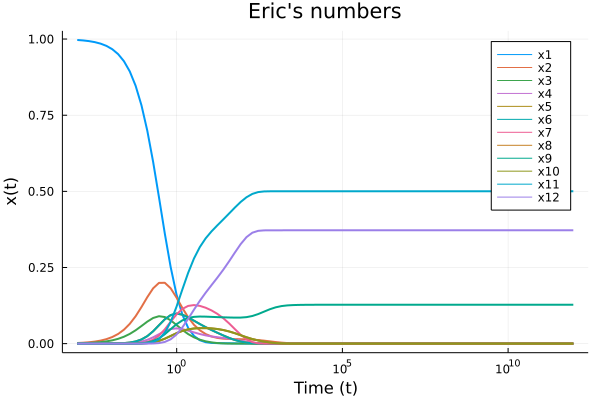

Keff in Julia
Kf(1,0)= 1.0000000000000006e-6
Kf(0,1)= 1000.0000000000002
Kf(1,1)= 3.0590232050182605e-16
Kf(2,0)= 3.0590232050182615e-25
Kf(2,1)= 9.357622968840188e-35
Kf(0,2)= 3.0590232050182594e-7
Kf(2,2)= 2.8625185805493984e-44
Kf(3,0)= 9.357622968840193e-44
Kf(0,3)= 9.357622968840181e-17
Kf(4,0)= 2.8625185805494008e-62
Kf(4,1)= 8.756510762696543e-72


In [21]:
# show(matrix1[3,2])

# the parameters used to generate this plot were:
# kd1 = 10^-12, kd2=10^-3, kOn =10^6, IC = 10^-6
p2=plot((matrix1[:,1],matrix1[:,2:13]),linewidth=2,title="Eric's numbers",xaxis = ("Time (t)",:log ),
yaxis="x(t)", label = ["x1" "x2" "x3" "x4" "x5" "x6" "x7" "x8" "x9" "x10" "x11" "x12"], plotjoined=true) # legend=false


# To compare: 
c0=1 # 1M
kd1 = 10^-12 #within a ring (inter) #the bigger the KD to weaker
kd2 = 10^-3 #between ring (intra)
kOn = 10^6 # 10^6 M^-1 s^-1
ΔGp = 9 # 9kcal/M
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 
x0Val=10^-6

paramvaluesList= x0Val, kOn, δ, Q, kd1, kd2
sol = StackedRings_EJD(paramvaluesList)
p1=plot(sol,linewidth=2,title="Our time course in Julia",xaxis = ("Time (sec)",:log ),
     yaxis="Species concentration (uM)", label = ["x1" "x2" "x3" "x4" "x5" "x6" "x7" "x8" "x9" "x10" "x11" "x12"] ) # legend=false

display(p1)
display(p2)



